In [16]:
!pip install qiskit


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [17]:
import pandas as pd
import numpy as np

In [18]:
df=pd.read_csv('pre_processed_data/df_x.csv')

In [19]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,51
0,-421.933197,67.155746,57.171242,43.808094,30.402605,19.547949,12.575122,9.644522,10.067670,12.613947,...,0.875584,0.844731,0.752748,0.606833,0.462912,0.367985,0.312484,0.242159,0.114321,-0.061157
1,-365.633881,108.539726,60.315517,23.098923,13.544962,19.193050,21.568050,17.362352,14.156395,14.938579,...,0.885893,1.622497,1.979759,1.524081,0.509754,-0.382064,-0.729049,-0.516610,0.141400,1.015036
2,-253.576401,100.315567,-9.214789,47.840969,-7.783815,19.813442,8.787479,24.717222,-9.867976,23.467943,...,2.270452,-1.679090,3.391043,0.610043,-0.917375,-1.126660,2.968965,0.356166,-2.242118,2.868686
3,-451.633301,92.521408,56.944550,36.281086,31.347248,29.666922,22.214220,15.512113,12.981874,13.580425,...,1.773361,1.702356,1.246825,1.571445,0.951902,1.196124,1.300772,1.106955,1.617338,1.154739
4,-407.378275,73.683738,50.203627,33.701793,29.657200,27.920149,21.115247,15.640450,13.227058,13.060699,...,1.997718,1.575596,1.452898,1.237956,1.028011,1.104231,1.240090,1.373660,1.447307,1.489727


In [20]:
features=df.iloc[:,:].values

In [21]:
features

array([[-4.21933197e+02,  6.71557465e+01,  5.71712418e+01, ...,
         2.42158696e-01,  1.14321209e-01, -6.11566231e-02],
       [-3.65633881e+02,  1.08539726e+02,  6.03155174e+01, ...,
        -5.16609728e-01,  1.41399726e-01,  1.01503587e+00],
       [-2.53576401e+02,  1.00315567e+02, -9.21478939e+00, ...,
         3.56165975e-01, -2.24211812e+00,  2.86868572e+00],
       ...,
       [-5.32895996e+02,  1.61298828e+02,  4.77858200e+01, ...,
         1.59218252e-01,  1.73575461e-01,  4.74873930e-01],
       [-5.19183350e+02,  1.47263733e+02,  4.92739639e+01, ...,
         9.87453982e-02,  6.59046546e-02,  3.63568962e-01],
       [ 2.61420822e+00,  1.13069177e-01,  1.59035511e-02, ...,
         2.57444611e-07,  2.00014583e-07,  3.66938799e-08]])

In [22]:
df_1=pd.read_csv('pre_processed_data/df_y.csv')

In [23]:
labels=df_1.iloc[:,:].values

In [24]:
!pip install qiskit-machine-learning


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [25]:
from sklearn.model_selection import train_test_split
from qiskit_algorithms.utils import algorithm_globals
algorithm_globals.random_seed = 123
train_features, test_features, train_labels, test_labels = train_test_split(
    features, labels, train_size=0.8, random_state=algorithm_globals.random_seed
)

In [26]:
!pip install pylatexenc


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [28]:
from qiskit_algorithms.optimizers import COBYLA
optimizer = COBYLA(maxiter=30)

In [29]:
from qiskit.primitives import Sampler
sampler = Sampler()

In [30]:
from sklearn.decomposition import PCA
pca=PCA(n_components=20)
pca.fit_transform(features)

array([[-1.88577814e+01, -2.45669442e+01, -1.34705502e+01, ...,
        -3.54011532e-01,  7.63658897e-01,  1.18263718e-01],
       [ 3.09899643e+01,  2.68663477e+01, -1.20430223e+01, ...,
         3.56915133e+00,  1.78659223e+00, -4.35502438e-01],
       [ 1.49226697e+02,  3.26838427e+01,  9.29766023e+00, ...,
        -2.06266939e-01,  6.36919862e-01,  3.66034052e+00],
       ...,
       [-1.37054070e+02,  6.20809713e+01,  3.66771618e+01, ...,
         2.84847790e+00, -1.73340619e+00,  1.84208746e-01],
       [-1.21691944e+02,  4.99938751e+01,  3.39854361e+01, ...,
         3.44924069e+00, -1.78969625e+00,  4.60835103e-01],
       [ 4.19194725e+02, -2.10449340e+01,  1.63060200e+01, ...,
        -4.91901317e-02, -9.34454315e-02, -2.20230493e-02]])

In [31]:
np.cumsum(pca.explained_variance_ratio_)

array([0.94270259, 0.97843307, 0.99027902, 0.99359217, 0.99530465,
       0.9968024 , 0.99767122, 0.99804032, 0.99837808, 0.99866637,
       0.9989003 , 0.99908433, 0.99921031, 0.99931641, 0.99940124,
       0.99947884, 0.99955203, 0.99961759, 0.99967285, 0.99971163])

In [32]:
pca.explained_variance_ratio_

array([9.42702586e-01, 3.57304831e-02, 1.18459493e-02, 3.31315068e-03,
       1.71248297e-03, 1.49775207e-03, 8.68813956e-04, 3.69099728e-04,
       3.37759364e-04, 2.88290790e-04, 2.33932281e-04, 1.84031780e-04,
       1.25977854e-04, 1.06099944e-04, 8.48272152e-05, 7.75990481e-05,
       7.31975978e-05, 6.55519294e-05, 5.52659015e-05, 3.87758979e-05])

In [33]:
pca_features=pca.fit_transform(train_features)

In [34]:
from qiskit.circuit.library import RealAmplitudes
from qiskit_algorithms.optimizers import COBYLA
from qiskit.primitives import Sampler
sampler = Sampler()

In [35]:
from qiskit.circuit.library import ZZFeatureMap
num_features = pca_features.shape[1]
feature_map = ZZFeatureMap(feature_dimension=num_features, reps=20)
#feature_map.decompose().draw(output="mpl", fold=20)

In [36]:
!pip install matplotlib


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


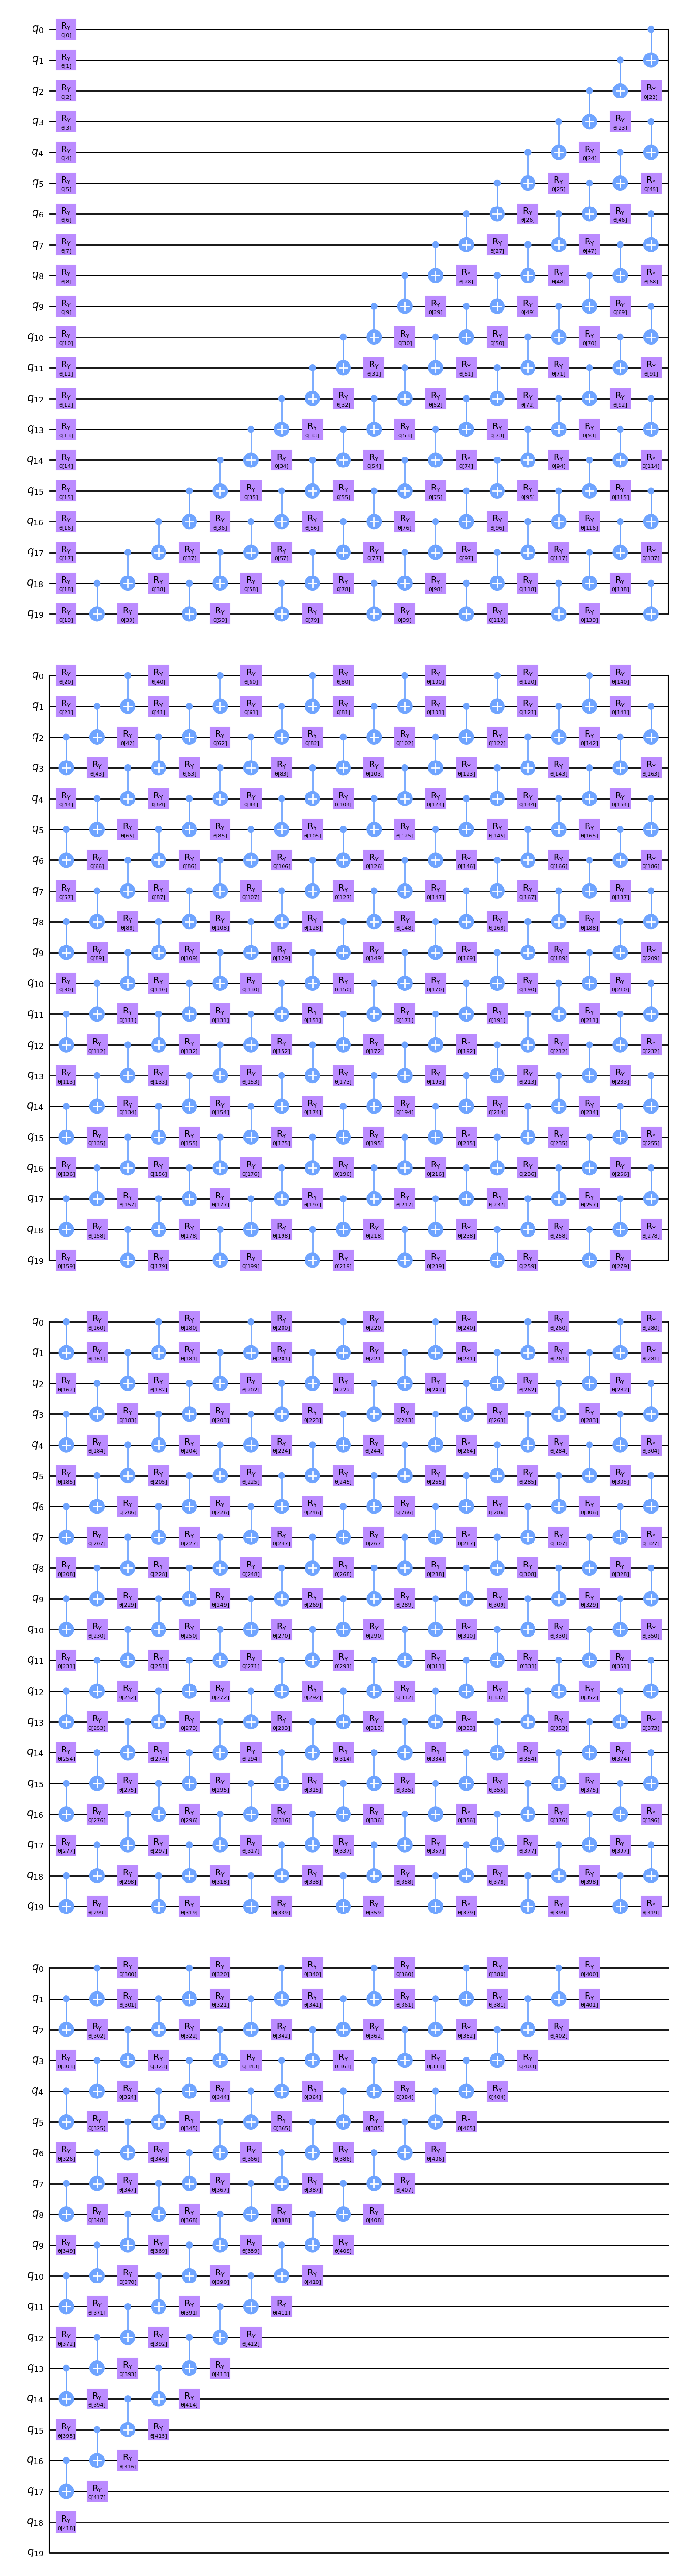

In [37]:
from qiskit.circuit.library import RealAmplitudes
ansatz = RealAmplitudes(num_qubits=num_features, reps=20)
ansatz.decompose().draw(output="mpl", fold=20)

In [38]:
from qiskit_algorithms.optimizers import COBYLA
optimizer = COBYLA(maxiter=450)

In [39]:
from qiskit.primitives import Sampler
sampler = Sampler()

In [40]:
from matplotlib import pyplot as plt
from IPython.display import clear_output
objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)
def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()

In [41]:
import time
from qiskit_machine_learning.algorithms.classifiers import VQC
vqc = VQC(
    sampler=sampler,
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=optimizer,
    callback=callback_graph
)

In [ ]:
objective_func_vals = []
start = time.time()
vqc.fit(pca_features, train_labels)
elapsed = time.time() - start
print(f"Training time: {round(elapsed)} seconds")

In [ ]:
train_score_q4 = vqc.score(train_features, train_labels)
test_score_q4 = vqc.score(test_features, test_labels)
print(f"Quantum VQC on the training dataset: {train_score_q4:.2f}")
print(f"Quantum VQC on the test dataset:     {test_score_q4:.2f}")